In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')


In [2]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['font.size'] = 10

In [3]:
df = pd.read_excel("Training data sample.xlsx")

In [4]:
df.head()

,geo,time,Channel0_impression,Channel1_impression,Channel2_impression,Channel3_impression,competitor_sales_control,sentiment_score_control,Channel0_spend,Channel1_spend,Channel2_spend,Channel3_spend,Organic_channel0_impression,Promo,conversions,revenue_per_conversion,population
0,Geo0,2021-01-25,280668,0,0,470611,-1.338765,0.115581,2058.0608,0.00000,0.00000,3667.3965,97320,0.000000,1954576.8,0.020055,136670.94
1,Geo0,2021-02-01,366206,182108,19825,527702,0.893645,0.944224,2685.2874,1755.74540,147.31808,4112.2974,201441,0.000000,2064249.6,0.020103,136670.94
2,Geo0,2021-02-08,197565,230170,0,393618,-0.284549,-1.290579,1448.6895,2219.12230,0.00000,3067.4023,0,0.683819,2086382.8,0.019929,136670.94
3,Geo0,2021-02-15,140990,66643,0,326034,-1.034740,-1.084514,1033.8406,642.52057,0.00000,2540.7310,0,1.289055,2826431.5,0.019987,136670.94
4,Geo0,2021-02-22,399116,164991,0,381982,-0.319276,-0.017503,2926.6072,1590.71640,0.00000,2976.7249,0,0.227739,3551929.2,0.020000,136670.94


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6240 entries, 0 to 6239
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   geo                          6240 non-null   object        
 1   time                         6240 non-null   datetime64[ns]
 2   Channel0_impression          6240 non-null   int64         
 3   Channel1_impression          6240 non-null   int64         
 4   Channel2_impression          6240 non-null   int64         
 5   Channel3_impression          6240 non-null   int64         
 6   competitor_sales_control     6240 non-null   float64       
 7   sentiment_score_control      6240 non-null   float64       
 8   Channel0_spend               6240 non-null   float64       
 9   Channel1_spend               6240 non-null   float64       
 10  Channel2_spend               6240 non-null   float64       
 11  Channel3_spend               6240 non-null 

In [6]:
df['total_revenue'] = df['conversions'] * df['revenue_per_conversion']

In [7]:
# sort by geo and time
df.sort_values(['geo', 'time']).reset_index(drop=True)

,geo,time,Channel0_impression,Channel1_impression,Channel2_impression,Channel3_impression,competitor_sales_control,sentiment_score_control,Channel0_spend,Channel1_spend,Channel2_spend,Channel3_spend,Organic_channel0_impression,Promo,conversions,revenue_per_conversion,population,total_revenue
0,Geo0,2021-01-25,280668,0,0,470611,-1.338765,0.115581,2058.0608,0.00000,0.00000,3667.3965,97320,0.000000,1954576.8,0.020055,136670.94,39198.556898
1,Geo0,2021-02-01,366206,182108,19825,527702,0.893645,0.944224,2685.2874,1755.74540,147.31808,4112.2974,201441,0.000000,2064249.6,0.020103,136670.94,41497.960631
2,Geo0,2021-02-08,197565,230170,0,393618,-0.284549,-1.290579,1448.6895,2219.12230,0.00000,3067.4023,0,0.683819,2086382.8,0.019929,136670.94,41579.088854
3,Geo0,2021-02-15,140990,66643,0,326034,-1.034740,-1.084514,1033.8406,642.52057,0.00000,2540.7310,0,1.289055,2826431.5,0.019987,136670.94,56492.861509
4,Geo0,2021-02-22,399116,164991,0,381982,-0.319276,-0.017503,2926.6072,1590.71640,0.00000,2976.7249,0,0.227739,3551929.2,0.020000,136670.94,71039.827175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6235,Geo9,2023-12-18,1464367,857806,0,1956612,-0.719707,0.331813,10737.7980,8270.30700,0.00000,15247.5650,541384,0.000000,15234047.0,0.020122,513695.22,306538.031265
6236,Geo9,2023-12-25,953124,489442,0,1427191,-1.053569,0.519312,6988.9946,4718.82370,0.00000,11121.8720,0,0.000000,18156892.0,0.020086,513695.22,364698.043573
6237,Geo9,2024-01-01,0,0,213133,2846124,0.548388,-0.569818,0.0000,0.00000,1583.77530,22179.3900,0,0.388046,10182924.0,0.019855,513695.22,202180.082362
6238,Geo9,2024-01-08,1209242,497181,0,1287116,-0.385787,0.364464,8867.0370,4793.43700,0.00000,10030.2900,709495,0.258418,12583538.0,0.020161,513695.22,253702.724549


In [8]:
df.head()

,geo,time,Channel0_impression,Channel1_impression,Channel2_impression,Channel3_impression,competitor_sales_control,sentiment_score_control,Channel0_spend,Channel1_spend,Channel2_spend,Channel3_spend,Organic_channel0_impression,Promo,conversions,revenue_per_conversion,population,total_revenue
0,Geo0,2021-01-25,280668,0,0,470611,-1.338765,0.115581,2058.0608,0.00000,0.00000,3667.3965,97320,0.000000,1954576.8,0.020055,136670.94,39198.556898
1,Geo0,2021-02-01,366206,182108,19825,527702,0.893645,0.944224,2685.2874,1755.74540,147.31808,4112.2974,201441,0.000000,2064249.6,0.020103,136670.94,41497.960631
2,Geo0,2021-02-08,197565,230170,0,393618,-0.284549,-1.290579,1448.6895,2219.12230,0.00000,3067.4023,0,0.683819,2086382.8,0.019929,136670.94,41579.088854
3,Geo0,2021-02-15,140990,66643,0,326034,-1.034740,-1.084514,1033.8406,642.52057,0.00000,2540.7310,0,1.289055,2826431.5,0.019987,136670.94,56492.861509
4,Geo0,2021-02-22,399116,164991,0,381982,-0.319276,-0.017503,2926.6072,1590.71640,0.00000,2976.7249,0,0.227739,3551929.2,0.020000,136670.94,71039.827175


In [9]:
df.shape

(6240, 18)

In [10]:
df.time.min()

Timestamp('2021-01-25 00:00:00')

In [11]:
df.time.max()

Timestamp('2024-01-15 00:00:00')

In [12]:
# number of geos
df.geo.nunique()

40

In [13]:
# number of weeks
df.time.nunique()

156

### DATA QUALITY REPORT

In [14]:
missing = df.isnull().sum()
missing

geo                            0
time                           0
Channel0_impression            0
Channel1_impression            0
Channel2_impression            0
Channel3_impression            0
competitor_sales_control       0
sentiment_score_control        0
Channel0_spend                 0
Channel1_spend                 0
Channel2_spend                 0
Channel3_spend                 0
Organic_channel0_impression    0
Promo                          0
conversions                    0
revenue_per_conversion         0
population                     0
total_revenue                  0
dtype: int64

In [15]:
missing_pct = (missing/ len(df)) * 100
missing_pct

geo                            0.0
time                           0.0
Channel0_impression            0.0
Channel1_impression            0.0
Channel2_impression            0.0
Channel3_impression            0.0
competitor_sales_control       0.0
sentiment_score_control        0.0
Channel0_spend                 0.0
Channel1_spend                 0.0
Channel2_spend                 0.0
Channel3_spend                 0.0
Organic_channel0_impression    0.0
Promo                          0.0
conversions                    0.0
revenue_per_conversion         0.0
population                     0.0
total_revenue                  0.0
dtype: float64

In [16]:
df.dtypes

geo                                    object
time                           datetime64[ns]
Channel0_impression                     int64
Channel1_impression                     int64
Channel2_impression                     int64
Channel3_impression                     int64
competitor_sales_control              float64
sentiment_score_control               float64
Channel0_spend                        float64
Channel1_spend                        float64
Channel2_spend                        float64
Channel3_spend                        float64
Organic_channel0_impression             int64
Promo                                 float64
conversions                           float64
revenue_per_conversion                float64
population                            float64
total_revenue                         float64
dtype: object

In [17]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

In [18]:
numeric_cols

Index(['Channel0_impression', 'Channel1_impression', 'Channel2_impression',
       'Channel3_impression', 'competitor_sales_control',
       'sentiment_score_control', 'Channel0_spend', 'Channel1_spend',
       'Channel2_spend', 'Channel3_spend', 'Organic_channel0_impression',
       'Promo', 'conversions', 'revenue_per_conversion', 'population',
       'total_revenue'],
      dtype='object')

In [46]:
# Outliers using IQR method
for col in numeric_cols[:]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_iqr = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if len(outliers_iqr) > 0:
        print(f"{col}: {len(outliers_iqr)} outliers ({len(outliers_iqr)/len(df) * 100:.1f}%)")


Channel0_impression: 164 outliers (2.6%)
Channel1_impression: 215 outliers (3.4%)
Channel2_impression: 941 outliers (15.1%)
Channel3_impression: 108 outliers (1.7%)
competitor_sales_control: 61 outliers (1.0%)
sentiment_score_control: 61 outliers (1.0%)
Channel0_spend: 164 outliers (2.6%)
Channel1_spend: 215 outliers (3.4%)
Channel2_spend: 941 outliers (15.1%)
Channel3_spend: 108 outliers (1.7%)
Organic_channel0_impression: 305 outliers (4.9%)
Promo: 248 outliers (4.0%)
conversions: 56 outliers (0.9%)
revenue_per_conversion: 43 outliers (0.7%)
total_revenue: 57 outliers (0.9%)


In [59]:
channel = 'Channel0_spend'

Q1 = df[channel].quantile(0.25)
Q3 = df[channel].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR

weekly_outliers = (
    df[df[channel] > upper]
    .groupby('time')[channel]
    .agg(['count', 'mean', 'sum'])
    .sort_index()
)

weekly_outliers = weekly_outliers.reset_index()
weekly_outliers.time.dt.month.value_counts()


time
6     11
10    10
11    10
12     9
8      8
9      8
1      8
2      6
7      6
5      5
4      4
3      3
Name: count, dtype: int64

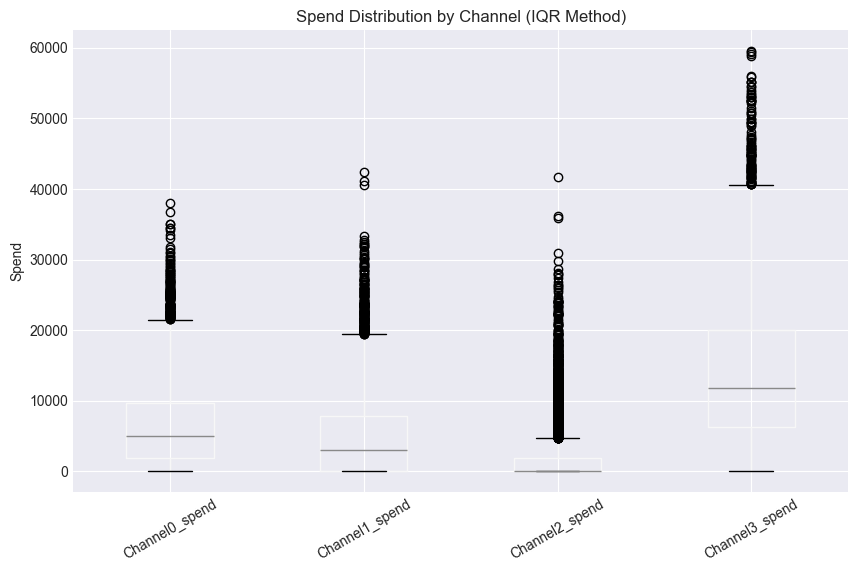

In [60]:
cols_to_plot = [
    'Channel0_spend',
    'Channel1_spend',
    'Channel2_spend',
    'Channel3_spend'
]

plt.figure(figsize=(10, 6))
df[cols_to_plot].boxplot()
plt.title('Spend Distribution by Channel (IQR Method)')
plt.ylabel('Spend')
plt.xticks(rotation=30)
plt.show()


In [20]:
# Business logic checks
spend_cols = [col for col in df.columns if 'spend' in col]
imp_cols = [col for col in df.columns if 'impression' in col and 'Organic' not in col]

In [21]:
spend_cols
imp_cols

['Channel0_impression',
 'Channel1_impression',
 'Channel2_impression',
 'Channel3_impression']

In [22]:
for spend_col, imp_col in zip(spend_cols, imp_cols):
    inconsistent = df[(df[spend_col] > 0) & (df[imp_col] == 0)]
    if len(inconsistent) > 0:
        print(f"{spend_col}: {len(inconsistent)} rows with spend but no impressions")


### DESCRIPTIVE STATISTICS

In [23]:
# overall summary
summary = df.describe().T

In [24]:
summary['cv'] = summary['std'] / summary['mean']
summary[['mean', 'std', 'min', '25%', '50%', '75%', 'max', 'cv']]

,mean,std,min,25%,50%,75%,max,cv
time,2022-07-21 11:59:59.999999744,NaN,2021-01-25 00:00:00,2021-10-23 06:00:00,2022-07-21 12:00:00,2023-04-18 18:00:00,2024-01-15 00:00:00,NaN
Channel0_impression,885163.536378,819345.148069,0.0,253645.75,679670.5,1324174.25,5192032.0,0.925643
Channel1_impression,520605.540545,620623.143377,0.0,0.0,310652.5,807552.5,4397540.0,1.192118
Channel2_impression,260505.027083,555184.172757,0.0,0.0,0.0,254734.0,5610156.0,2.131184
Channel3_impression,1806810.449359,1304818.09259,0.0,808356.5,1505379.0,2566118.25,7635147.0,0.722167
competitor_sales_control,-0.044412,1.210164,-4.825634,-0.872736,-0.050346,0.743633,3.924682,-27.248579
sentiment_score_control,-0.033675,1.175572,-4.230392,-0.808085,-0.036433,0.739391,4.320259,-34.90925
Channel0_spend,6490.659147,6008.031135,0.0,1859.914025,4983.8355,9709.803,38071.73,0.925643
Channel1_spend,5019.278558,5983.571424,0.0,0.0,2995.07265,7785.800675,42397.7,1.192118
Channel2_spend,1935.793164,4125.531614,0.0,0.0,0.0,1892.90915,41688.645,2.131184


In [25]:
# channel spend breakdown
spend_cols = [col for col in df.columns if 'spend' in col]
spend_summary = df[spend_cols].sum().sort_values(ascending=False)
spend_pct = (spend_summary /  spend_summary.sum()) * 100

spend_df = pd.DataFrame({
    'total_spend': spend_summary,
    'percent_of_total': spend_pct
})
spend_pct

Channel3_spend    51.152468
Channel0_spend    23.580175
Channel1_spend    18.234737
Channel2_spend     7.032620
dtype: float64

In [62]:
df[spend_cols].sum().sort_values(ascending=False)

Channel3_spend    8.786036e+07
Channel0_spend    4.050171e+07
Channel1_spend    3.132030e+07
Channel2_spend    1.207935e+07
dtype: float64

In [ ]:
# revenue metrics
print(f"Total Revenue Spend: ${df.total_revenue.sum():,.2f}")
print(f"Average Weekly Revenue : ${df.total_revenue.mean():,.2f}")
print(f"Revenue StdDev : ${df.total_revenue.std():,.2f}")
print(f"Total Conversions : ${df.conversions.sum():,.0f}")
print(f"Average Revenue per Conversion : ${df.revenue_per_conversion.mean():.2f}")


Total Revenue Spend: $1,318,699,437.74
Average Weekly Revenue : $211,330.04
Revenue StdDev : $121,605.91
Total Conversions : $65,930,714,113
Average Revenue per COnversion : $0.02


### TIME SERIES ANALYSIS

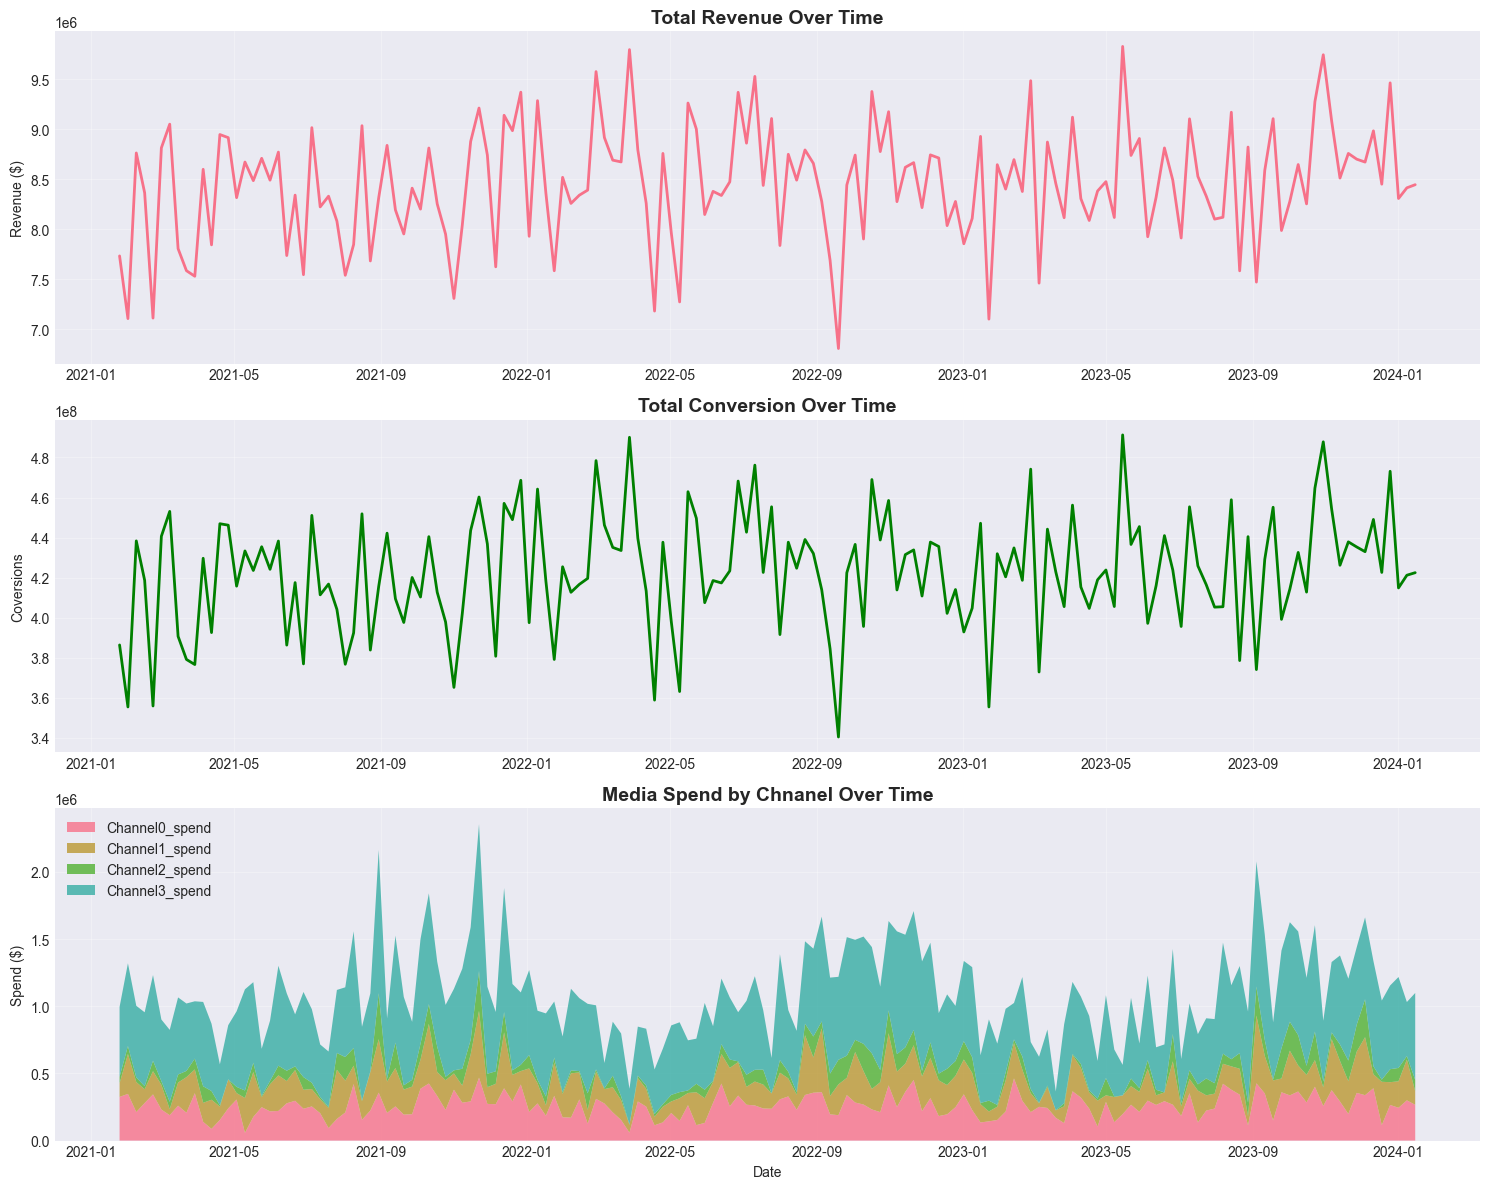

In [27]:
# aggregate by week
weekly_agg = df.groupby('time').agg({
    'total_revenue': 'sum',
    'conversions': 'sum',
    'Channel0_spend': 'sum',
    'Channel1_spend': 'sum',
    'Channel2_spend': 'sum',
    'Channel3_spend': 'sum'
}).reset_index()

# plot revenue trend
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# revenue
axes[0].plot(weekly_agg.time, weekly_agg.total_revenue, linewidth=2)
axes[0].set_title('Total Revenue Over Time', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Revenue ($)')
axes[0].grid(True, alpha=0.3)

# conversions
axes[1].plot(weekly_agg.time, weekly_agg.conversions, linewidth=2, color='green')
axes[1].set_title('Total Conversion Over Time', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Coversions')
axes[1].grid(True, alpha=0.3)

# spend by channel (stacked)
spend_cols = ['Channel0_spend', 'Channel1_spend', 'Channel2_spend', 'Channel3_spend']
axes[2].stackplot(
    weekly_agg.time,
    weekly_agg.Channel0_spend,
    weekly_agg.Channel1_spend,
    weekly_agg.Channel2_spend,
    weekly_agg.Channel3_spend,
    labels=spend_cols,
    alpha=0.8
)
axes[2].set_title('Media Spend by Chnanel Over Time', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Spend ($)')
axes[2].set_xlabel('Date')
axes[2].legend(loc='upper left')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('time_series_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

### CORRELATION ANALYSIS

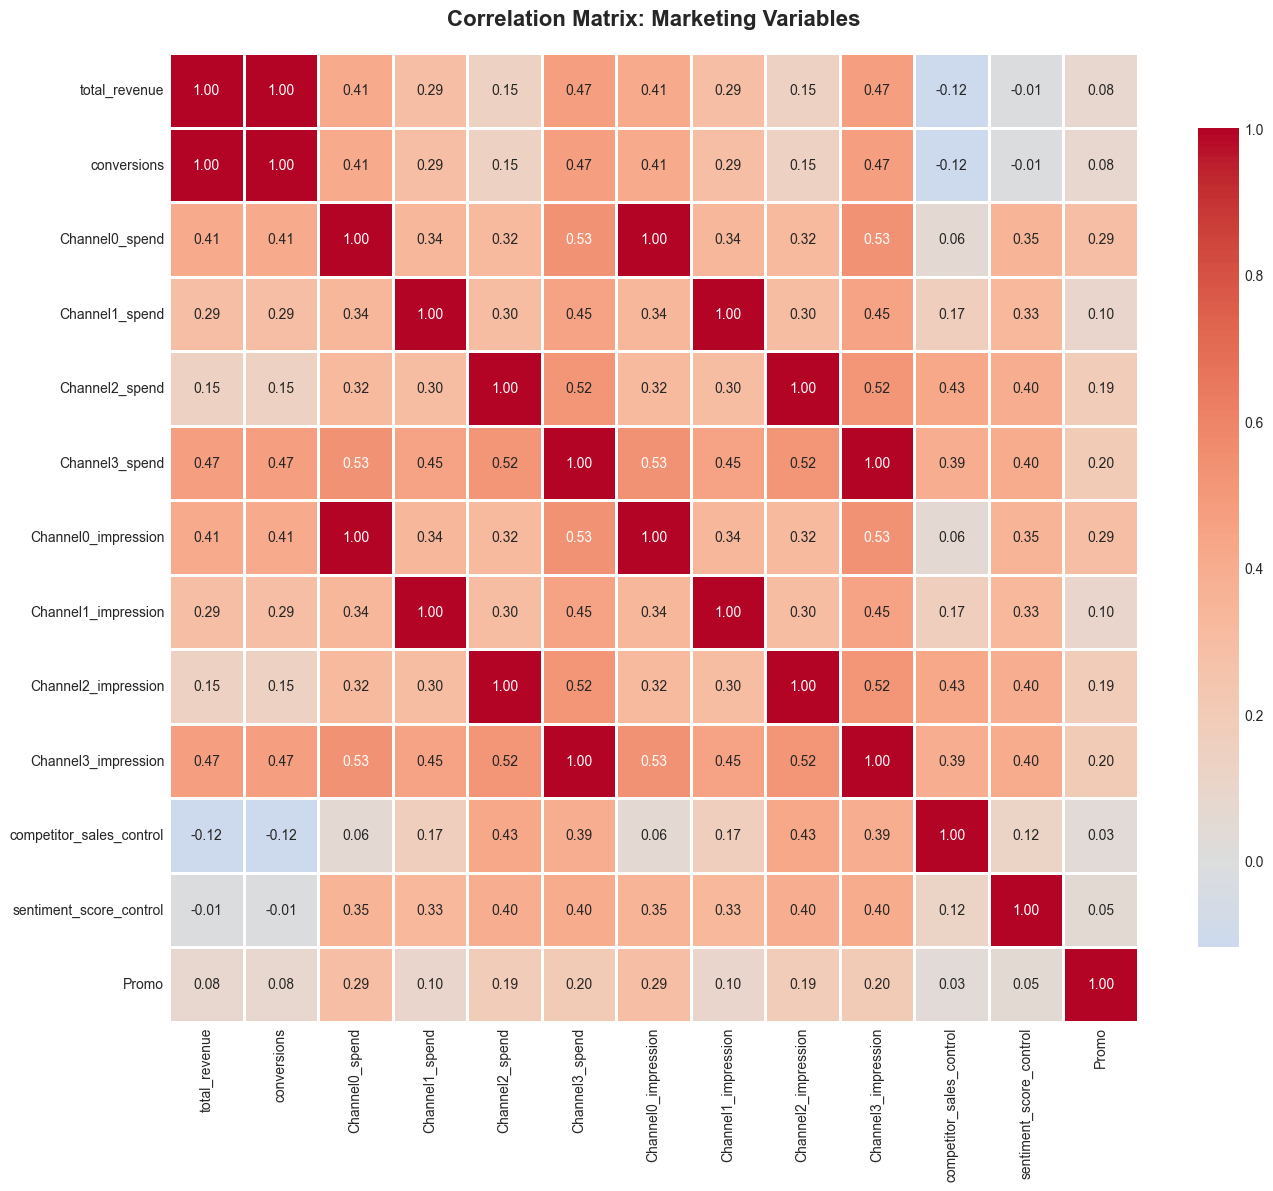

In [28]:
# select columns for correlation
corr_cols = [
    'total_revenue', 'conversions', 
    'Channel0_spend', 'Channel1_spend', 'Channel2_spend', 'Channel3_spend',
    'Channel0_impression', 'Channel1_impression', 'Channel2_impression', 'Channel3_impression',
    'competitor_sales_control', 'sentiment_score_control', 'Promo'
    ]

# calculate correlation matrix
corr_matrix = df[corr_cols].corr()

#plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True,
            linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix: Marketing Variables', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')


In [29]:
# highlight jey corrleations with revenue
revenue_corr = corr_matrix['total_revenue'].sort_values(ascending=False)
revenue_corr

total_revenue               1.000000
conversions                 0.999950
Channel3_spend              0.468858
Channel3_impression         0.468858
Channel0_spend              0.413745
Channel0_impression         0.413745
Channel1_spend              0.292958
Channel1_impression         0.292958
Channel2_impression         0.147973
Channel2_spend              0.147973
Promo                       0.080113
sentiment_score_control    -0.009409
competitor_sales_control   -0.116704
Name: total_revenue, dtype: float64

In [30]:
# multicollinearity check (VIF)
spend_cols
vif_data = pd.DataFrame()
vif_data['Variable'] = spend_cols
vif_data['VIF'] = [variance_inflation_factor(df[spend_cols].values, i) 
                   for i in range(len(spend_cols))]
# VIF > 10 indicates high multicollinearity
vif_data

,Variable,VIF
0,Channel0_spend,2.941075
1,Channel1_spend,2.162752
2,Channel2_spend,1.637056
3,Channel3_spend,4.099373


### CHANNEL EFFICIENCY ANALYSIS

In [31]:
# calculate CPM (Cost Per Mille - per 1000 impressions)
# Calculate CPM (Cost Per Mille - per 1000 impressions)
channels = ['Channel0', 'Channel1', 'Channel2', 'Channel3']
efficiency_metrics = []
    
for channel in channels:
    spend_col = f'{channel}_spend'
    imp_col = f'{channel}_impression'
        
    total_spend = df[spend_col].sum()
    total_impressions = df[imp_col].sum()
        
    if total_impressions > 0:
        cpm = (total_spend / total_impressions) * 1000
    else:
        cpm = np.nan
        
    # Naive ROI (revenue in same week as spend - not accounting for lag)
    channel_data = df[df[spend_col] > 0].copy()
    if len(channel_data) > 0:
        naive_roi = channel_data['total_revenue'].sum() / channel_data[spend_col].sum()
    else:
        naive_roi = np.nan
        
    efficiency_metrics.append({
        'Channel': channel,
        'Total_Spend': total_spend,
        'Total_Impressions': total_impressions,
        'CPM': cpm,
        'Naive_ROI': naive_roi
    })
    
efficiency_df = pd.DataFrame(efficiency_metrics)

In [32]:
efficiency_df

,Channel,Total_Spend,Total_Impressions,CPM,Naive_ROI
0,Channel0,4.050171e+07,5523420467,7.332723,28.730433
1,Channel1,3.132030e+07,3248578573,9.641232,30.254200
2,Channel2,1.207935e+07,1625551369,7.430924,38.076163
3,Channel3,8.786036e+07,11274497204,7.792840,14.552767


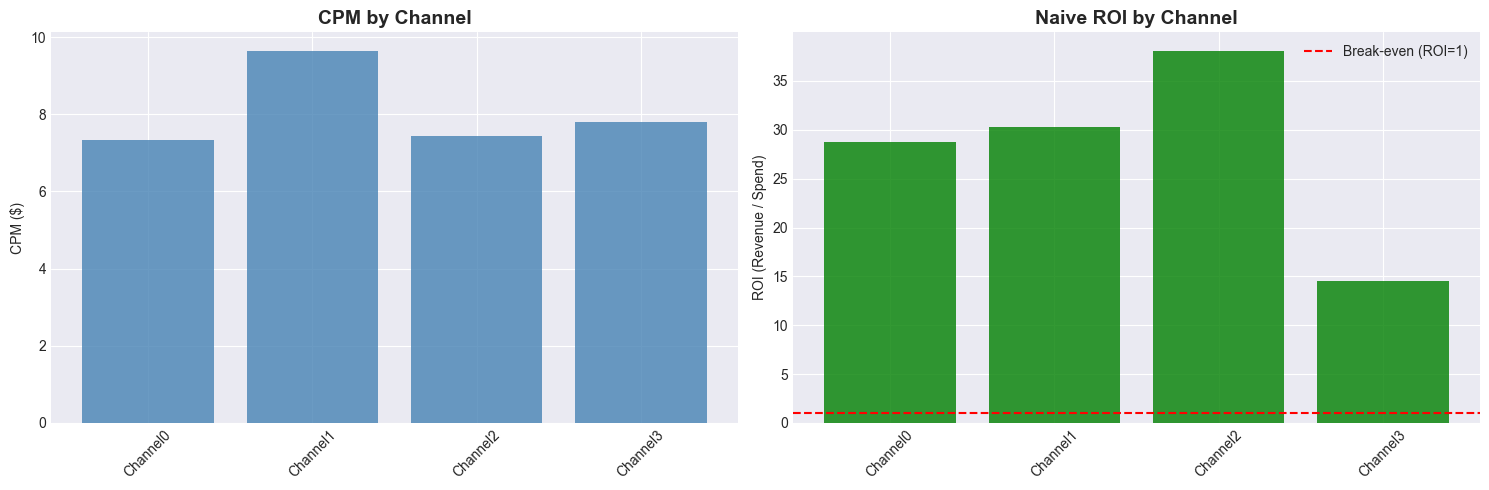

In [33]:
# visualize
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# CPM comparison
axes[0].bar(efficiency_df['Channel'], efficiency_df['CPM'], color='steelblue', alpha=0.8)
axes[0].set_title('CPM by Channel', fontsize=14, fontweight='bold')
axes[0].set_ylabel('CPM ($)')
axes[0].tick_params(axis='x', rotation=45)

# Naive ROI comparison
axes[1].bar(efficiency_df['Channel'], efficiency_df['Naive_ROI'], color='green', alpha=0.8)
axes[1].axhline(y=1, color='red', linestyle='--', label='Break-even (ROI=1)')
axes[1].set_title('Naive ROI by Channel', fontsize=14, fontweight='bold')
axes[1].set_ylabel('ROI (Revenue / Spend)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend()

plt.tight_layout()
plt.savefig('channel_efficiency.png', dpi=300, bbox_inches='tight')

### GEOGRAPHIC ANALYSIS

In [34]:
# aggregate by geo
geo_summary = df.groupby('geo').agg({
    'total_revenue': 'sum',
    'conversions': 'sum',
    'Channel0_spend': 'sum',
    'Channel1_spend': 'sum',
    'Channel2_spend': 'sum',
    'Channel3_spend': 'sum',
    'population': 'mean'  
}).reset_index()

In [35]:
# revenue per capital
geo_summary['revenue_per_capita'] = geo_summary['total_revenue'] / geo_summary['population']

In [36]:
# sort by revenue
geo_summary = geo_summary.sort_values('total_revenue', ascending=False)
geo_summary[['geo', 'total_revenue', 'conversions', 'revenue_per_capita']].head(10)


,geo,total_revenue,conversions,revenue_per_capita
30,Geo36,6.581648e+07,3.290565e+09,67.859982
33,Geo39,6.448245e+07,3.222847e+09,80.710093
2,Geo10,6.191079e+07,3.093954e+09,62.281426
16,Geo23,5.673184e+07,2.836450e+09,57.796989
25,Geo31,5.367754e+07,2.684670e+09,61.460278
37,Geo7,5.153221e+07,2.578130e+09,70.208363
12,Geo2,4.937024e+07,2.468820e+09,55.324883
18,Geo25,4.872741e+07,2.437115e+09,62.536626
9,Geo17,4.408524e+07,2.201843e+09,56.698366
7,Geo15,4.316274e+07,2.158194e+09,63.452060


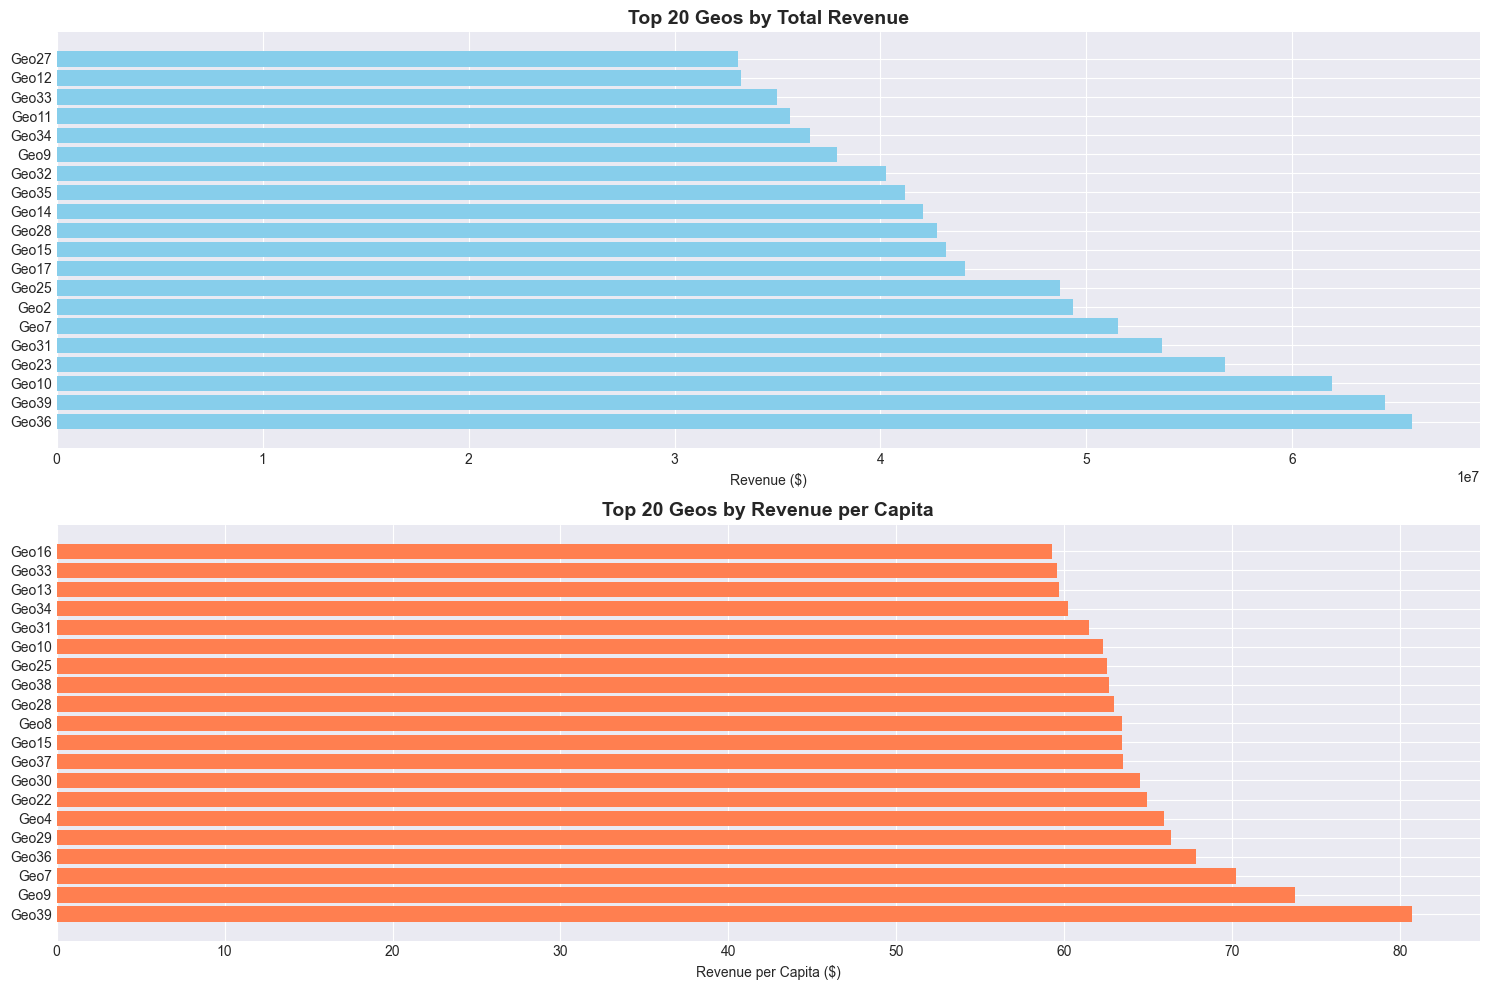

In [39]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# revenue by geo (top 20)
top_geos = geo_summary.head(20)
axes[0].barh(top_geos['geo'], top_geos['total_revenue'], color='skyblue')
axes[0].set_title('Top 20 Geos by Total Revenue', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Revenue ($)')

top_geos_capita = geo_summary.sort_values('revenue_per_capita', ascending=False).head(20)
axes[1].barh(top_geos_capita['geo'], top_geos_capita['revenue_per_capita'], color='coral')
axes[1].set_title('Top 20 Geos by Revenue per Capita', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Revenue per Capita ($)')

plt.tight_layout()
plt.savefig('geographical_analysis.png', dpi=300, bbox_inches='tight')

### CONTROL VARIABLES IMPACT

In [42]:
# Promotional Impact
if df.Promo.max() > 0:
    promo_yes = df[df['Promo'] > 0]['total_revenue'].mean()
    promo_no = df[df['Promo'] == 0]['total_revenue'].mean()

    print(f"Average Revenue (Promo Active): ${promo_yes:,.2f}")
    print(f"Average Revenue (No Promo): ${promo_no:,.2f}")
    print(f"Lift: {((promo_yes/promo_no - 1) * 100):.1f}%")

    # statistical test
    t_stat, p_value = stats.ttest_ind(
        df[df['Promo'] > 0]['total_revenue'],
        df[df['Promo'] > 0]['total_revenue'],
    )
    print(f"T-test p-value: {p_value:.4f} ({'Significant' if p_value < 0.05 else 'Not Significant'})")


Average Revenue (Promo Active): $217,832.00
Average Revenue (No Promo): $203,946.90
Lift: 6.8%
T-test p-value: 1.0000 (Not Significant)


In [ ]:
# sentiment correlation (impact)
sentiment_corr = df[['sentiment_score_control', 'total_revenue']].corr().iloc[0, 1]
print(f"{sentiment_corr:.3f}")

-0.009


In [45]:
# competitor sales correlation (impact)
competitor_corr = df[['competitor_sales_control', 'total_revenue']].corr().iloc[0, 1]
print(f"Correlation with Revenue: {competitor_corr:.3f}")
print(f"Interpretation: {'Negative (competitors hurt our sales)' if competitor_corr < 0 else 'Positive (rising tide lifts all boats)'}")


Correlation with Revenue: -0.117
Interpretation: Negative (competitors hurt our sales)
